### Added 30% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 30% TO FEATURE \n')

df = duplicates_utils.replace_duplicates_values(df, 30)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 30% TO FEATURE 

Number of rows:  9984
Duplicate Counts:  2995
Percentage of Duplicate Values:  29.997996794871796


## Decision Tree

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1541
           1       0.83      0.93      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.88      0.87      0.87      2996

Node Labels:
 Annotation(0.575239, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3451.0, 3537.0]\nclass = 1')


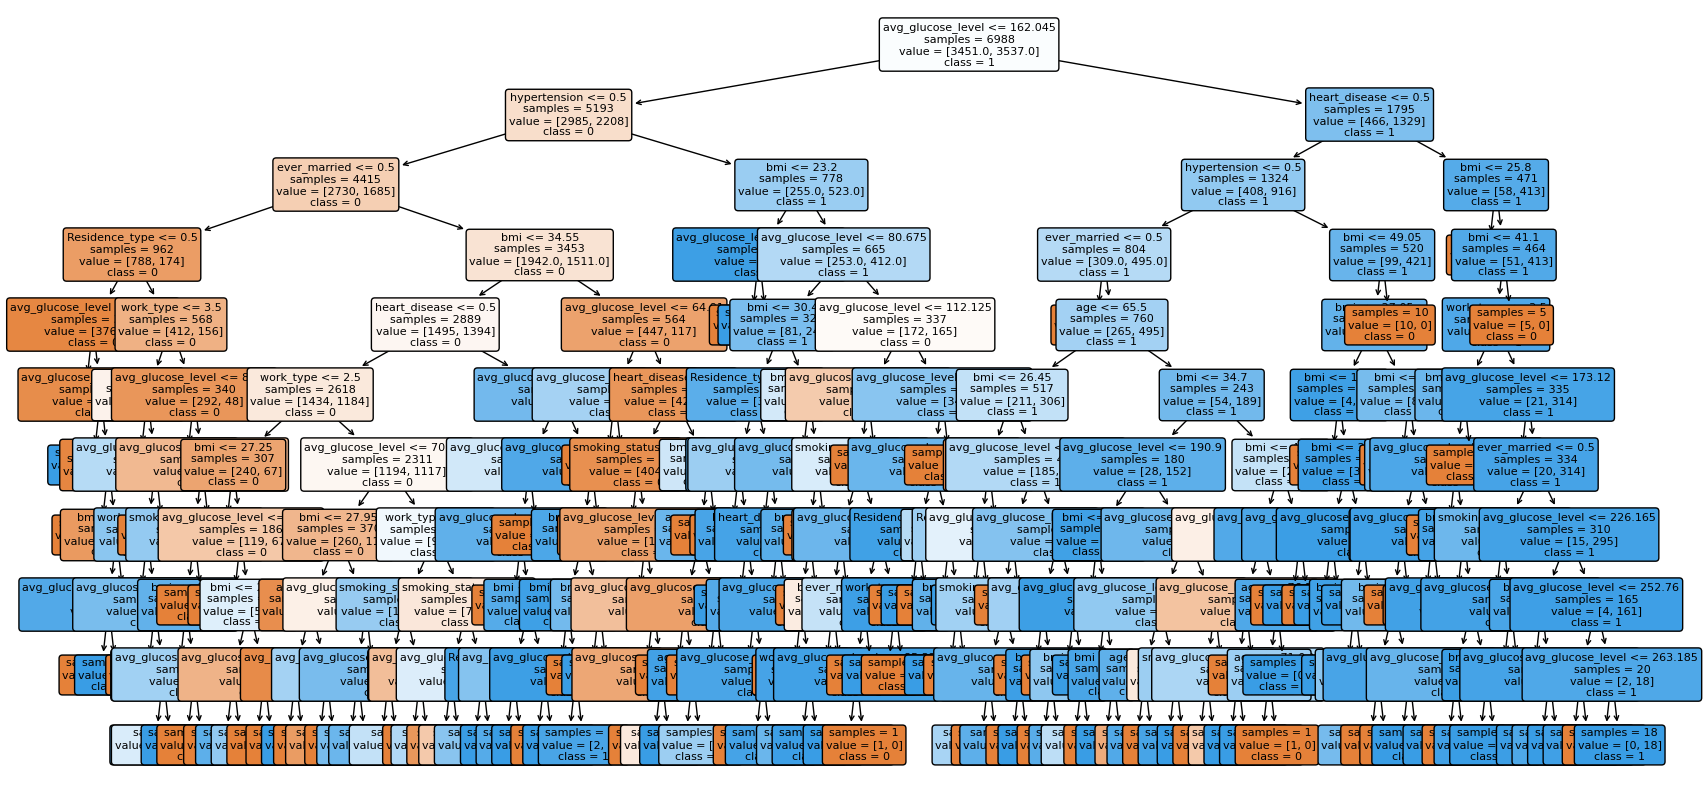

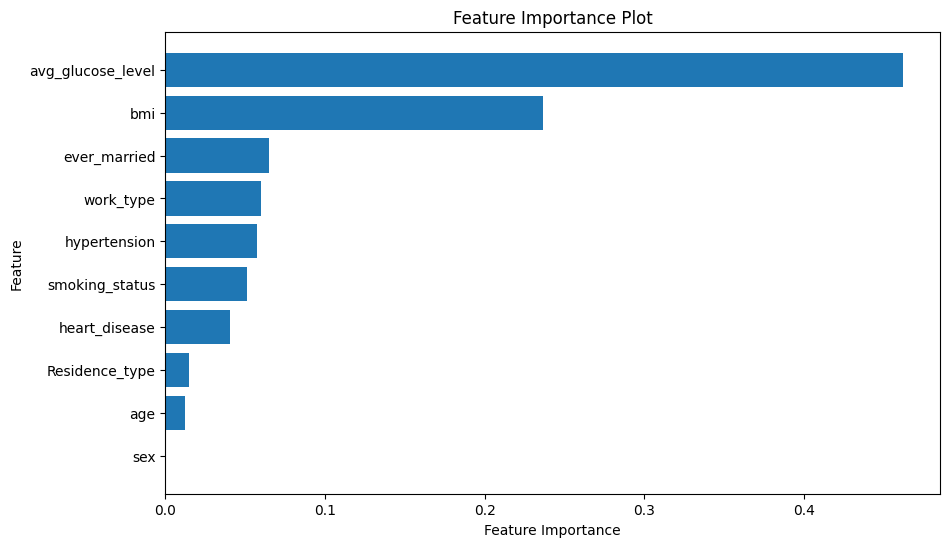

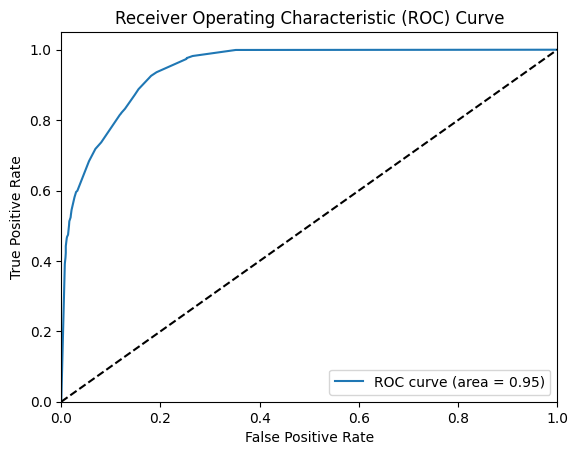

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9456001034718831
Accuracy for each fold: [0.8433333333333334, 0.8133333333333334, 0.7666666666666667, 0.82, 0.82, 0.8333333333333334, 0.8361204013377926, 0.8494983277591973, 0.8595317725752508, 0.7591973244147158]
Mean accuracy: 0.8201014492753622
95% confidence interval: (0.7962553209946073, 0.8439475775561172)


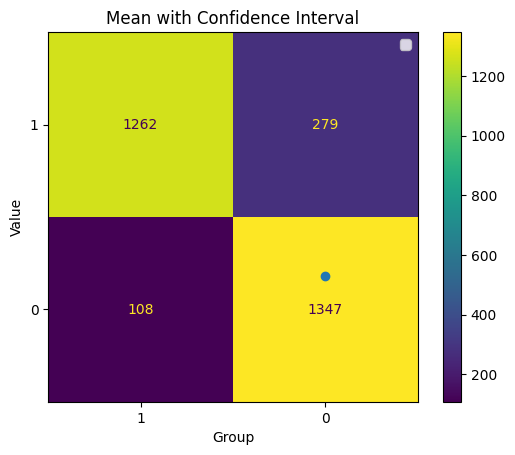

In [3]:
y_pred_prob, y_test_dt, decision_tree = ML_algorithms.model_dt(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


## Support Vector Machine

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1541
           1       0.70      0.61      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



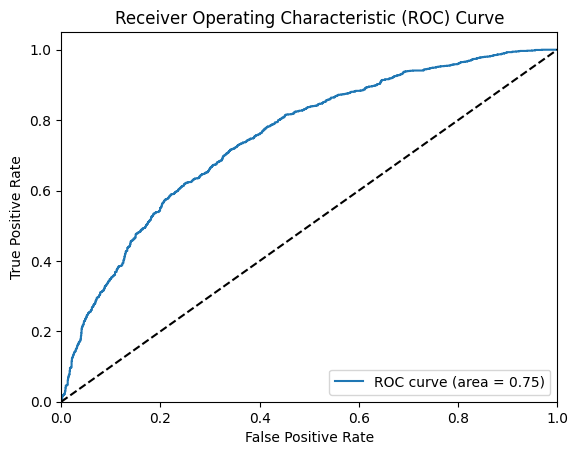

AUC Score: 0.7501247683590118


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6466666666666666, 0.6566666666666666, 0.6133333333333333, 0.6733333333333333, 0.7, 0.6533333333333333, 0.6555183946488294, 0.6387959866220736, 0.7157190635451505, 0.6822742474916388]
Mean accuracy: 0.6635641025641025
95% confidence interval: (0.6420606335053535, 0.6850675716228515)


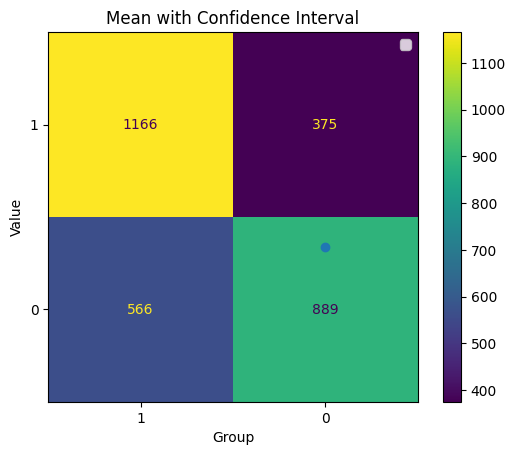

--------------------------------------


In [4]:
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.model_svm(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

print('--------------------------------------')

## Conclusion

### ROC Curve 

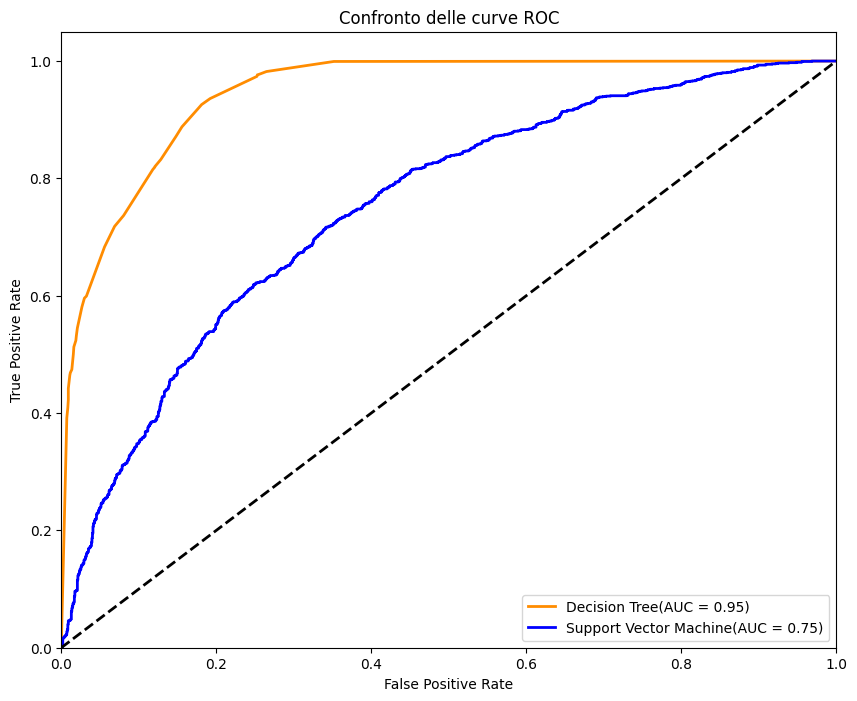

In [5]:
ML_algorithms.plot_roc_curve_conlusion(y_pred_prob, y_test_dt, y_pred_prob_svm, y_test_svm)